In [1]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_digits

# Klasyfikacja
## Algorytm KNN

In [ ]:
with open('./admission.txt', 'r') as f:
    reader = csv.reader(f)
    X = []
    y = []

    for row in reader:
        x1, x2, lbl = float(row[0]), float(row[1]), float(row[2])
        X.append([x1, x2])
        y.append(lbl)

X = np.array(X)
y = np.array(y)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

In [ ]:
def classify(X, y, example, k=3):
    '''
    :param X: zbiór (uczący) danych postaci ndarray (m, n), gdzie m to liczba przykładów, a n liczba cech
    :param y: zbiór wartości (labels) w postaci wektora ndarray (m, ). Każdy z elementów ma wartość 0 lub 1
    :param example: wektor cech danego przykładu postaci ndarray (n, )
    :param k: parametr k algorytmu knn
    :return: predykcja klasy przykładu. 0 lub 1
    '''

    distances = [(np.linalg.norm(X[i] - example), y[i]) for i in range(X.shape[0])]
    k_nearest = sorted(distances, key=lambda x: x[0])[:k]
    k_labels = [label for _, label in k_nearest]
    majority_class = Counter(k_labels).most_common(1)[0][0]

    return majority_class

In [ ]:
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
accuracies_test = []
accuracies_train = []

for k in k_values:
    y_pred = np.zeros(y_test.shape)     
    for example_idx, example in enumerate(x_test):
        pred = classify(x_train, y_train, example, k)   
        y_pred[example_idx] = pred
    accuracy = np.sum(y_pred == y_test) / len(y_test)   
    accuracies_test.append(accuracy)

for k in k_values:
    y_pred = np.zeros(y_train.shape)
    for example_idx, example in enumerate(x_train):
        pred = classify(x_train, y_train, example, k)
        y_pred[example_idx] = pred
    accuracy = np.sum(y_pred == y_train) / len(y_train)
    accuracies_train.append(accuracy)

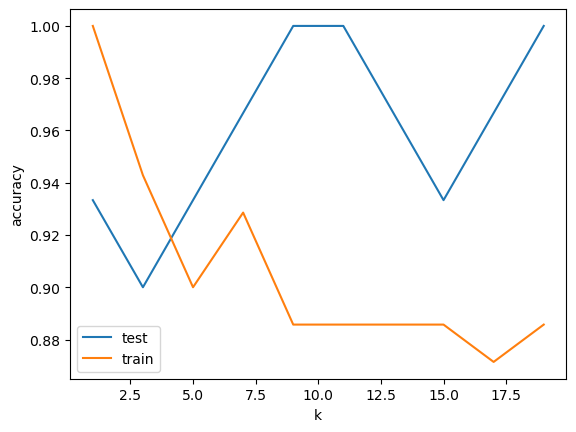

In [5]:
plt.plot(k_values, accuracies_test, label='test')
plt.plot(k_values, accuracies_train, label='train')
plt.xlabel('k')
plt.ylabel('accuracy')  
plt.legend()
plt.show()

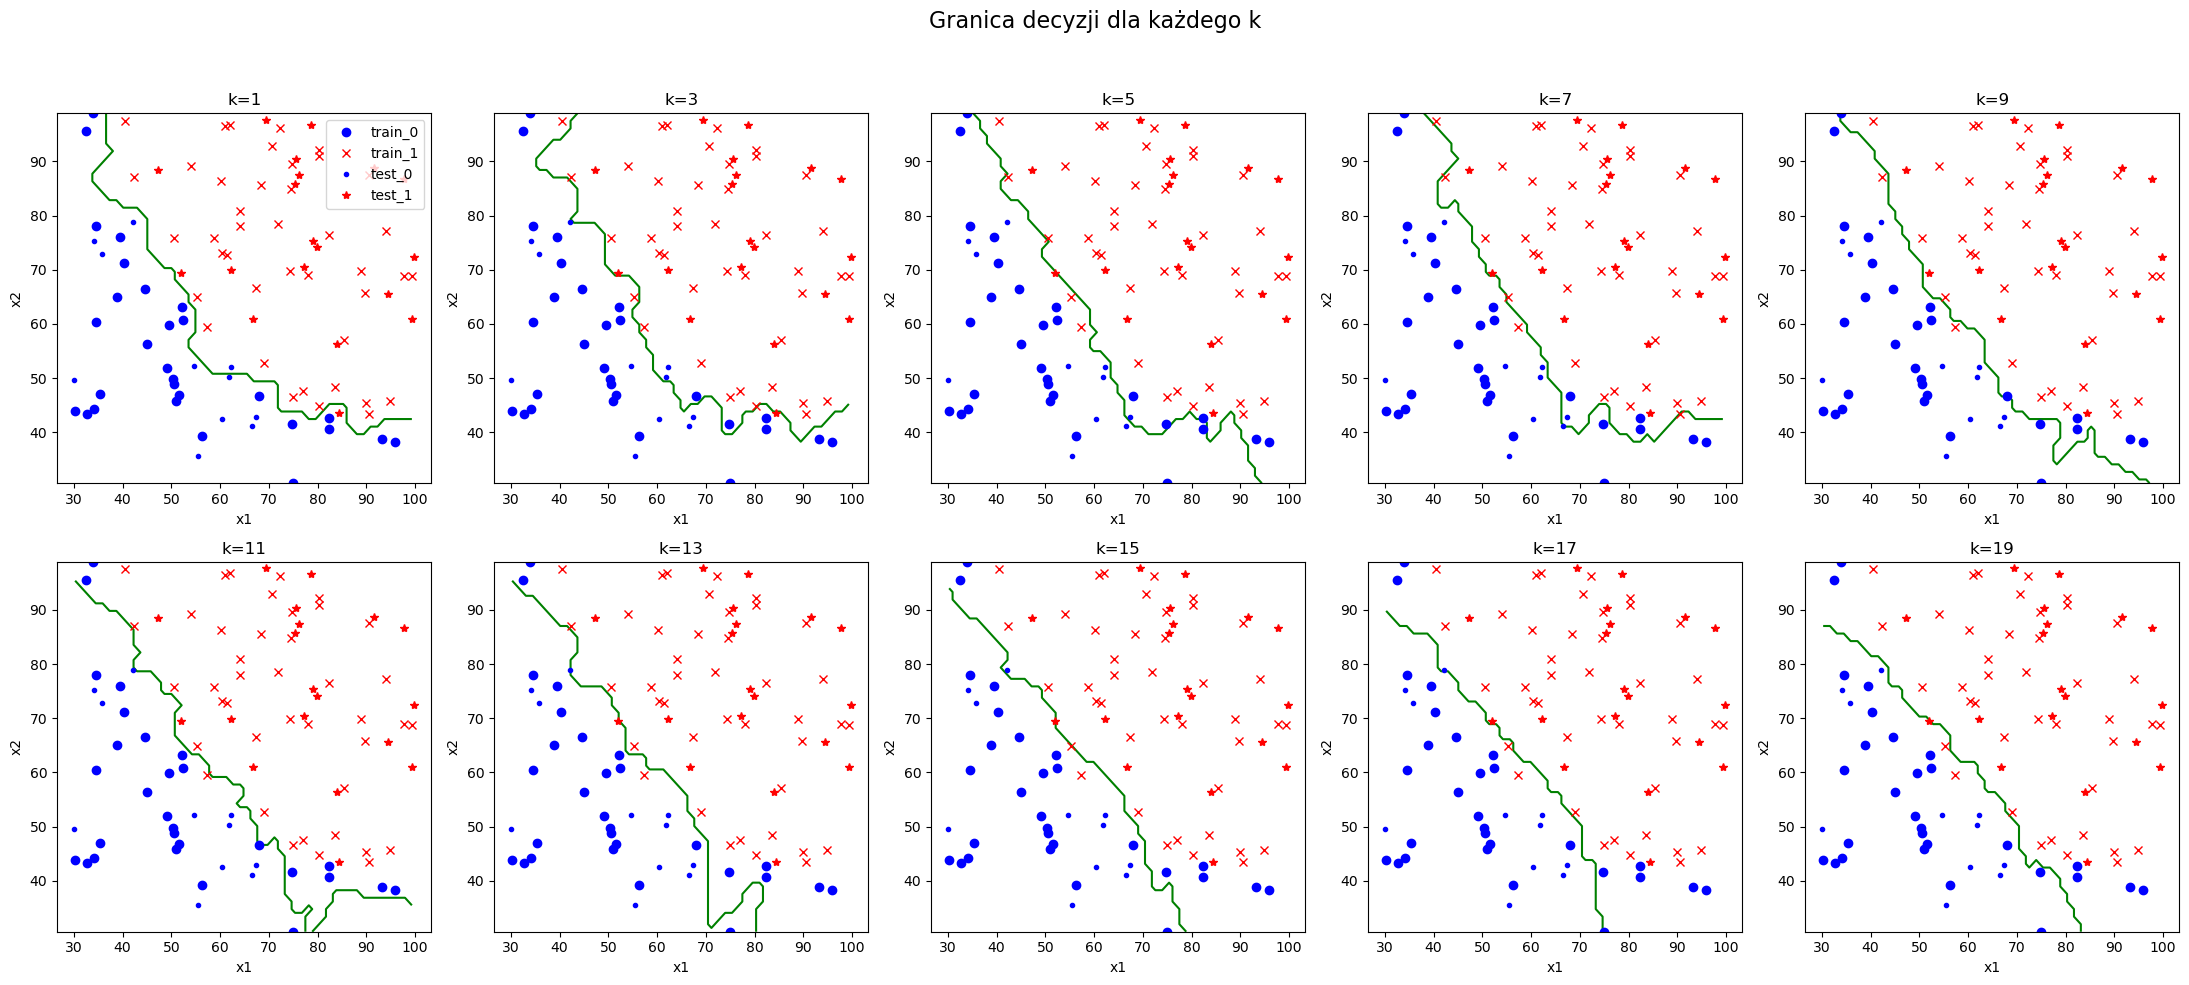

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(22, 10)) 
fig.suptitle('Granica decyzji dla każdego k', fontsize=16)

for idx, (k, ax) in enumerate(zip(k_values, axes.ravel())):
    ax.set_title(f'k={k}')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')

    x1_res = 50
    x2_res = 50
    x1 = np.linspace(x_train[:, 0].min(), x_train[:, 0].max(), x1_res)
    x2 = np.linspace(x_train[:, 1].min(), x_train[:, 1].max(), x2_res)
    x1x1, x2x2 = np.meshgrid(x1, x2)
    x1x2_range_comb = np.c_[x1x1.ravel(), x2x2.ravel()]

    labels_space = np.array([classify(x_train, y_train, example, k) for example in x1x2_range_comb])
    labels_space = labels_space.reshape(x1x1.shape)
    ax.contour(x1x1, x2x2, labels_space, levels=[0.5], colors='g')

    ax.plot(x_train[y_train == 0, 0], x_train[y_train == 0, 1], 'bo')
    ax.plot(x_train[y_train == 1, 0], x_train[y_train == 1, 1], 'rx')

    ax.plot(x_test[y_test == 0, 0], x_test[y_test == 0, 1], 'b.')
    ax.plot(x_test[y_test == 1, 0], x_test[y_test == 1, 1], 'r*')

    
    if idx == 0:
        ax.legend(['train_0', 'train_1', 'test_0', 'test_1'], loc='best')

plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()

In [ ]:
y_train.shape, y_test.shape, x_train.shape, x_test.shape  

((70,), (30,), (70, 2), (30, 2))

In [ ]:
k = 9
y_pred = np.zeros(y_test.shape)
for example_idx, example in enumerate(x_test):
    pred = classify(x_test, y_test, example, k)
    y_pred[example_idx] = pred

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92        11
         1.0       1.00      0.89      0.94        19

    accuracy                           0.93        30
   macro avg       0.92      0.95      0.93        30
weighted avg       0.94      0.93      0.93        30

[[11  0]
 [ 2 17]]


In [9]:
knn_classifier = KNeighborsClassifier(k)
knn_classifier.fit(x_train, y_train)
y_pred = knn_classifier.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      1.00      1.00        19

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[11  0]
 [ 0 19]]


# To samo na Digits

In [10]:
data = load_digits()
y = data['target']
x = data['data']
y.shape, x.shape

((1797,), (1797, 64))

(1797, 64)


<Figure size 640x480 with 0 Axes>

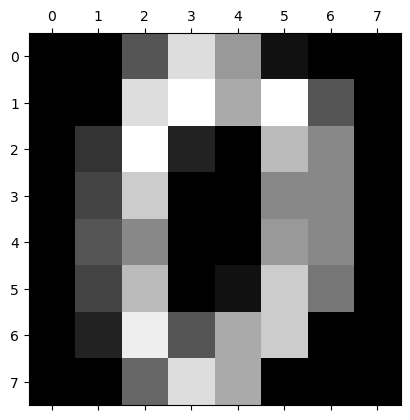

In [11]:
print(data.data.shape)
plt.gray()
plt.matshow(data.images[0])
plt.show()

In [12]:
k_values = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

for k in k_values:
    y_pred = np.zeros(y.shape)
    for example_idx, example in enumerate(x):
        pred = classify(x, y, example, k)
        y_pred[example_idx] = pred
    print(classification_report(y, y_pred))
    print(confusion_matrix(y, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       178
           1       1.00      1.00      1.00       182
           2       1.00      1.00      1.00       177
           3       1.00      1.00      1.00       183
           4       1.00      1.00      1.00       181
           5       1.00      1.00      1.00       182
           6       1.00      1.00      1.00       181
           7       1.00      1.00      1.00       179
           8       1.00      1.00      1.00       174
           9       1.00      1.00      1.00       180

    accuracy                           1.00      1797
   macro avg       1.00      1.00      1.00      1797
weighted avg       1.00      1.00      1.00      1797

[[178   0   0   0   0   0   0   0   0   0]
 [  0 182   0   0   0   0   0   0   0   0]
 [  0   0 177   0   0   0   0   0   0   0]
 [  0   0   0 183   0   0   0   0   0   0]
 [  0   0   0   0 181   0   0   0   0   0]
 [  0   0   0   0   0 182 

# Decision Trees

In [13]:
with open('./admission.txt', 'r') as f:
    reader = csv.reader(f)
    X = []
    y = []
    for row in reader:
        x1, x2, lbl = float(row[0]), float(row[1]), float(row[2])
        X.append([x1, x2])
        y.append(lbl)
X = np.array(X)
y = np.array(y)
 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

In [ ]:

lvls = [1, 2, 3, 4, 5, 6, 7]
for lvl in lvls:
  decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=lvl)
  decision_tree.fit(x_train, y_train)
  y_pred = decision_tree.predict(x_test)
  test_acc = np.sum(y_pred == y_test) / len(y_test)
  train_acc = decision_tree.score(x_train, y_train)
  print(f"level: {lvl}, test acc: {test_acc}, train acc: {train_acc}")

level: 1, test acc: 0.7, train acc: 0.8428571428571429
level: 2, test acc: 0.8333333333333334, train acc: 0.9428571428571428
level: 3, test acc: 0.8333333333333334, train acc: 0.9857142857142858
level: 4, test acc: 0.8333333333333334, train acc: 1.0
level: 5, test acc: 0.8333333333333334, train acc: 1.0
level: 6, test acc: 0.8333333333333334, train acc: 1.0
level: 7, test acc: 0.8333333333333334, train acc: 1.0


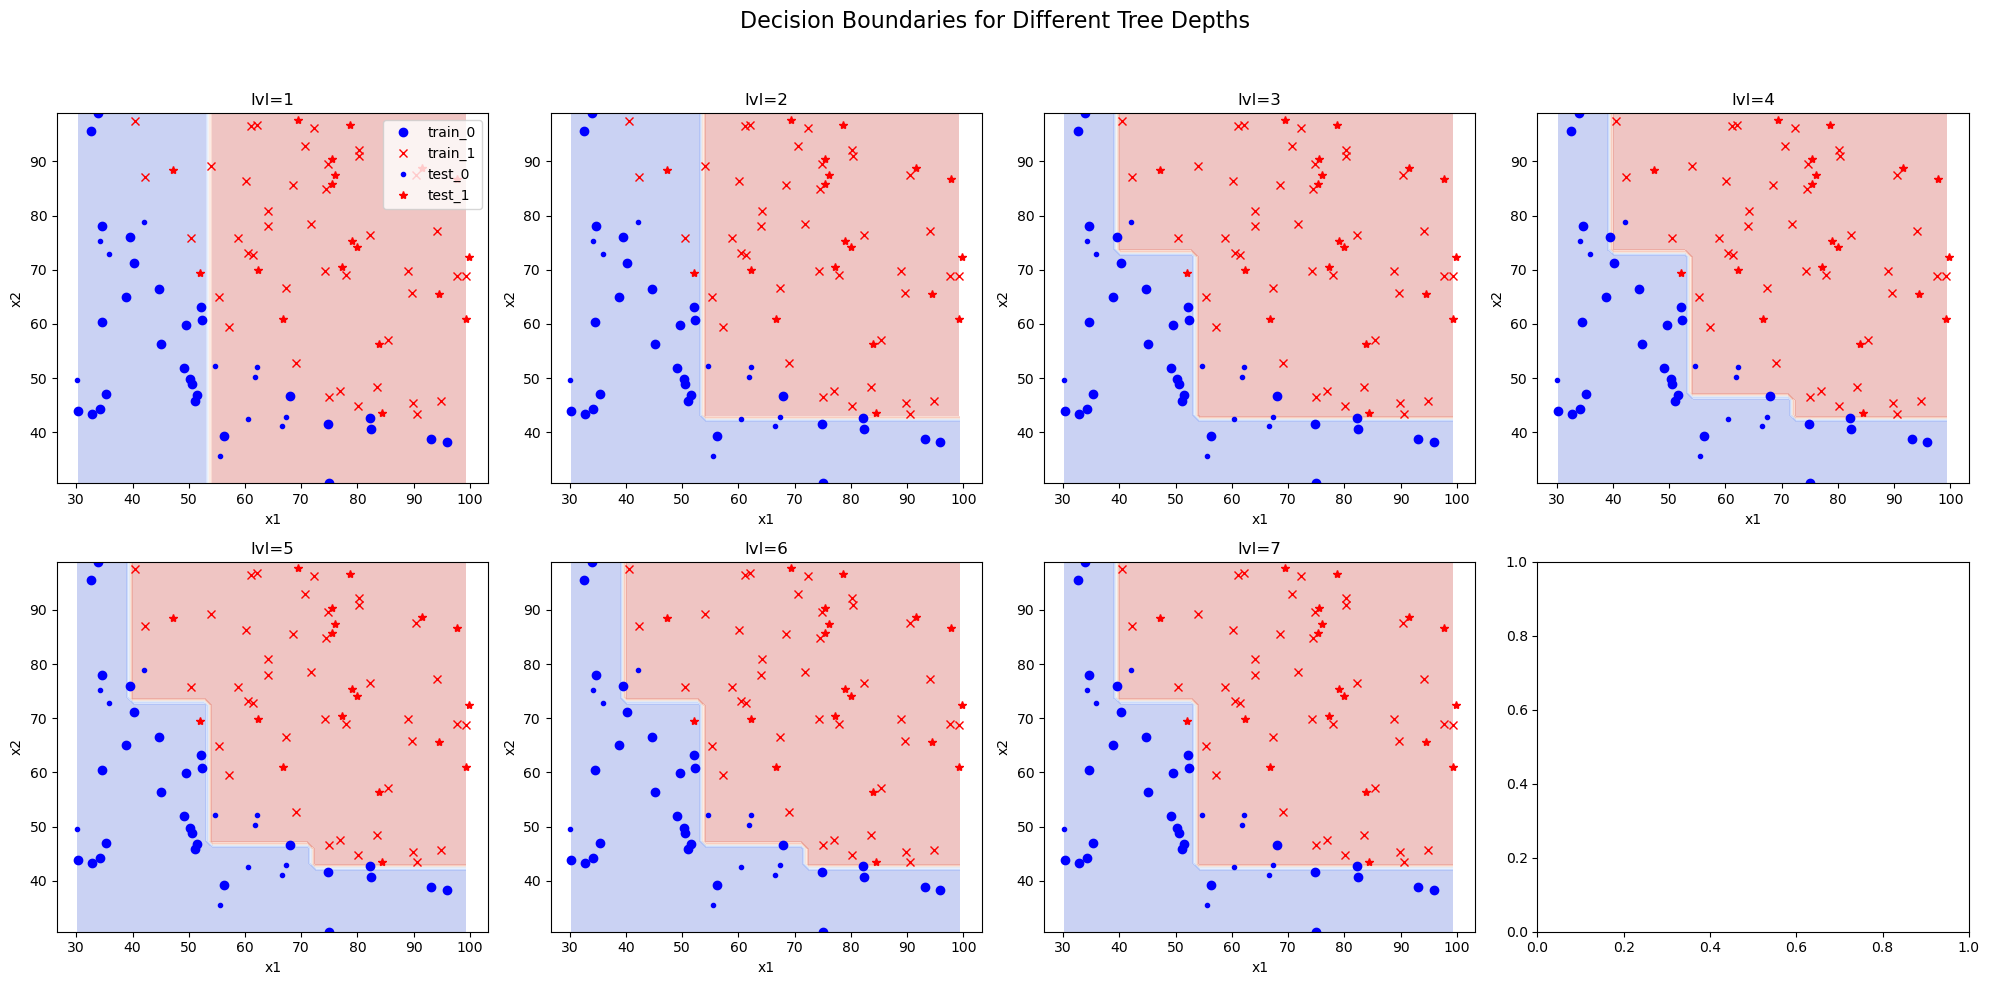

level: 1, test acc: 0.70, train acc: 0.84
level: 2, test acc: 0.83, train acc: 0.94
level: 3, test acc: 0.83, train acc: 0.99
level: 4, test acc: 0.83, train acc: 1.00
level: 5, test acc: 0.83, train acc: 1.00
level: 6, test acc: 0.83, train acc: 1.00
level: 7, test acc: 0.83, train acc: 1.00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier


lvls = [1, 2, 3, 4, 5, 6, 7]


fig, axes = plt.subplots(2, 4, figsize=(20, 10))  
fig.suptitle('Decision Boundaries for Different Tree Depths', fontsize=16)


for idx, (lvl, ax) in enumerate(zip(lvls, axes.ravel())):
    ax.set_title(f'lvl={lvl}')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')

    decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=lvl)
    decision_tree.fit(x_train, y_train)

    x1_res = 50
    x2_res = 50
    x1 = np.linspace(x_train[:, 0].min(), x_train[:, 0].max(), x1_res)
    x2 = np.linspace(x_train[:, 1].min(), x_train[:, 1].max(), x2_res)
    x1x1, x2x2 = np.meshgrid(x1, x2)
    x1x2_range_comb = np.c_[x1x1.ravel(), x2x2.ravel()]

    labels_space = decision_tree.predict(x1x2_range_comb)
    labels_space = labels_space.reshape(x1x1.shape)

    ax.contourf(x1x1, x2x2, labels_space, alpha=0.3, cmap='coolwarm')

    ax.plot(x_train[y_train == 0, 0], x_train[y_train == 0, 1], 'bo')
    ax.plot(x_train[y_train == 1, 0], x_train[y_train == 1, 1], 'rx')

    ax.plot(x_test[y_test == 0, 0], x_test[y_test == 0, 1], 'b.')
    ax.plot(x_test[y_test == 1, 0], x_test[y_test == 1, 1], 'r*')

    if idx == 0:
        ax.legend(['train_0', 'train_1', 'test_0', 'test_1'], loc='best')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the main title
plt.show()

    
for lvl in lvls:
    decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=lvl)
    decision_tree.fit(x_train, y_train)
    y_pred = decision_tree.predict(x_test)
    test_acc = np.sum(y_pred == y_test) / len(y_test)
    train_acc = decision_tree.score(x_train, y_train)
    print(f"level: {lvl}, test acc: {test_acc:.2f}, train acc: {train_acc:.2f}")